# Overfitting experiment

In [879]:
import numpy as np
import matplotlib.pyplot as plt

In [880]:
np.random.seed(0)

In [881]:
def parabola(x, a, b, c):
    """Parabola function."""
    return np.polyval([a, b, c], x)

In [882]:
a_true = 1
b_true = -2
c_true = 1

In [883]:
x = np.linspace(-5, 5, 8, endpoint=True)
x_plot = np.linspace(-15, 15, 500, endpoint=True)

y_plot   = parabola(x_plot, a_true, b_true, c_true)  # True parabola
std_noise = 5
y_sample = parabola(x, a_true, b_true, c_true) + np.random.normal(0, std_noise, len(x)) 

Text(0, 0.5, 'y')

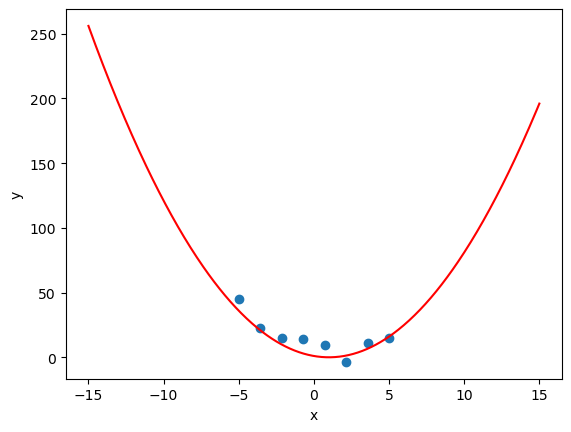

In [884]:
plt.scatter(x, y_sample, label='Data points')
plt.plot(x_plot, y_plot, color='red', label='True function')
plt.xlabel('x')
plt.ylabel('y')

In [885]:
coefficients_2 = np.polyfit(x, y_sample, deg=2)
print("Fitted coefficients:", coefficients_2)

Fitted coefficients: [ 0.88468193 -2.70414973  6.65608327]


Text(0, 0.5, 'y')

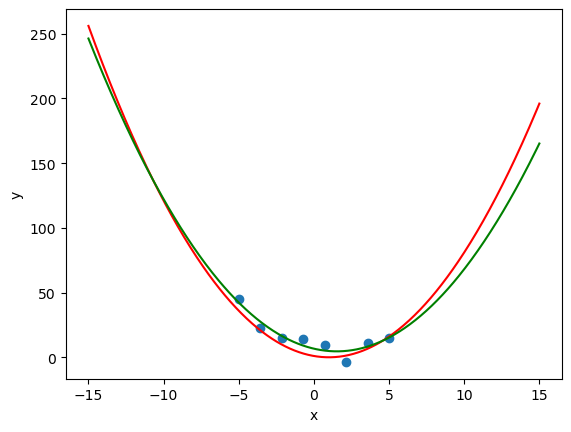

In [886]:
plt.scatter(x, y_sample, label='Data points')
plt.plot(x_plot, y_plot, color='red', label='True function')
plt.plot(x_plot, np.polyval(coefficients_2, x_plot), color='green', label='Fitted function')
plt.xlabel('x')
plt.ylabel('y')

In [887]:
high_degree = 6
coefficients_high = np.polyfit(x, y_sample, deg=high_degree)
print("Fitted coefficients:", coefficients_high)

Fitted coefficients: [-1.04853233e-02 -1.74826690e-02  4.26406721e-01  5.59089479e-01
 -3.44269971e+00 -5.99843256e+00  1.34282069e+01]


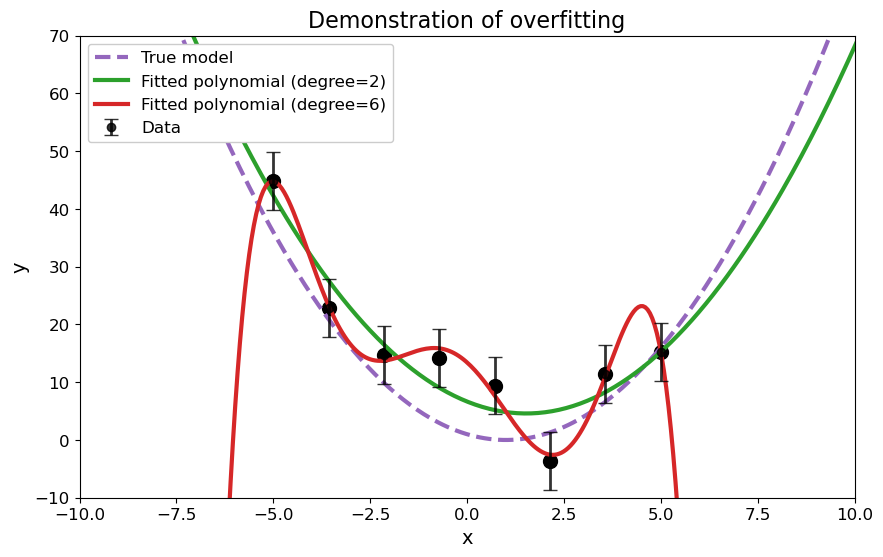

In [888]:
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, color='C4', label='True model', linestyle='--', linewidth=3)
plt.plot(x_plot, np.polyval(coefficients_2, x_plot), color='C2', 
         label='Fitted polynomial (degree=2)', linewidth=3)
plt.plot(x_plot, np.polyval(coefficients_high, x_plot), color='C3', 
         label=f'Fitted polynomial (degree={high_degree})', linewidth=3)
plt.errorbar(x, y_sample, yerr=std_noise, fmt='o', color='k', capsize=5, elinewidth=2, alpha=.8, label="Data")
plt.scatter(x, y_sample, color='k', s=100)
plt.xlim(-10, 10)
plt.ylim(-10, 70)
plt.xlabel('x', fontsize=14); plt.xticks(fontsize=12)
plt.ylabel('y', fontsize=14); plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12, framealpha=1)
plt.title('Demonstration of overfitting', fontsize=16)
plt.savefig('overfitting.pdf', transparent=True)
plt.show()

# Chi-square evaluation

In [889]:
chisq_2 = np.sum((y_sample - np.polyval(coefficients_2, x))**2 / std_noise**2)
chisq_high = np.sum((y_sample - np.polyval(coefficients_high, x))**2 / std_noise**2)
print("Chi-squared for degree 2 polynomial:", chisq_2)
print(f"Chi-squared for degree {high_degree} polynomial:", chisq_high)


Chi-squared for degree 2 polynomial: 6.2946303438018045
Chi-squared for degree 6 polynomial: 0.3323772723528668


In [890]:
degree_of_freedom = len(x) - len(coefficients_2)
print("Degrees of freedom:", degree_of_freedom)
# degree_of_freedom_high = len(x) - len(coefficients_high)
# print("Degrees of freedom:", degree_of_freedom_high)

Degrees of freedom: 5


In [891]:
reduced_chisq_2 = chisq_2 / degree_of_freedom
print("Reduced chi-squared for degree 2 polynomial:", reduced_chisq_2)
reduced_chisq_high = chisq_high / degree_of_freedom
print(f"Reduced chi-squared for degree {high_degree} polynomial:", reduced_chisq_high)

Reduced chi-squared for degree 2 polynomial: 1.258926068760361
Reduced chi-squared for degree 6 polynomial: 0.06647545447057336
